In [1]:
import astropy
import matplotlib
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy import wcs
import astropy.wcs
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import numpy as np
from astropy.coordinates import match_coordinates_sky
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import interpolate_replace_nans
from astropy.nddata.utils import Cutout2D
import matplotlib.pyplot as mpl
from matplotlib import cm
import matplotlib as mp
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
import astropy.units as u
from spectral_cube import SpectralCube
from matplotlib.colors import LogNorm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go
import skimage.measure as measure

import astropy.io.fits as pyfits

# Top down parabola figure

lower error age 32
upper error age 123
LOS position of Stone Cloud (100yrs)=  10.54590927735553
LOS position of Stone Cloud (118yrs)=  12.592103406393198
LOS position of Stone Cloud (146yrs)=  35.89781098567668
LOS position of Stone Cloud (140 yrs)=  16.836672871102838
LOS position of Stone Cloud (213yrs)=  29.63697512654647
LOS position of Stone Cloud (upper error)=  37.89344373366691
LOS position of Stone Cloud (lower error)=  10.54590927735553


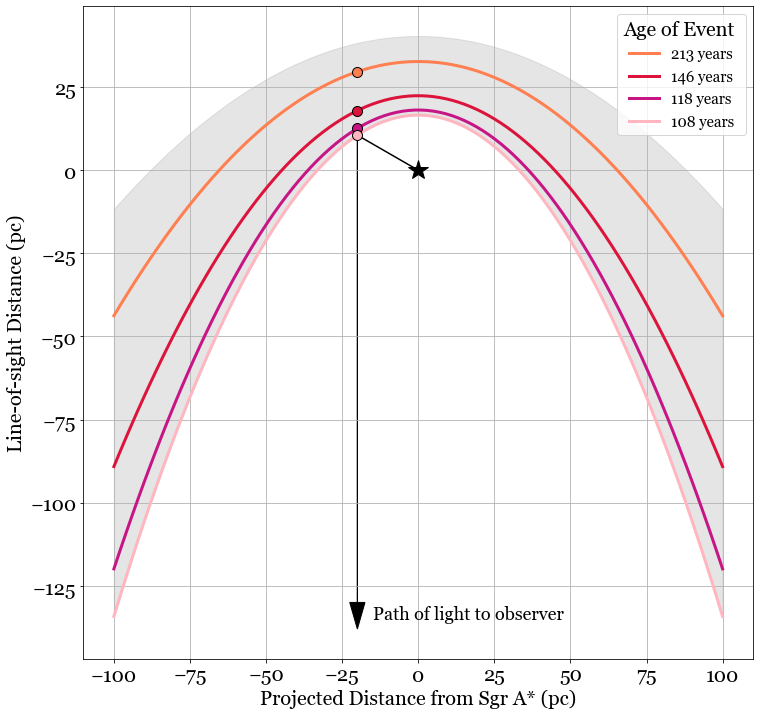

In [17]:
fig_top_down_gc = plt.figure(figsize=(12, 12))
plt.rcParams['font.sans-serif'] = "georgia"
d_proj=np.linspace(-100,100,100) #in parsecs
c= .307 #pc/year

sgra_pos = [0, 0]
stone_pos = [-20, 10.54590927735553]
observer_pos=[-20,-130]
t_clavel= 108 #time in years (108 for cloud starting at 2008, 100 for cloud starting at 2000) (Clavel et al. 2013)
t_churazov= 118 #time in years (118 for cloud starting at 2008, 110 for cloud starting at 2000)(Churazov et al. 2017)
t_chuard= 146 # +27 , -17 (138 for 2000 reference year, add 8 for 2008 reference year)(Chuard et al. 2018)
t_chuard2= 119 #time in years (119 for cloud starting at 2008, 111 for cloud starting at 2000) +14, -11(Chuard et al. 2018)
t_marin=205+8 #+50 -30 years (Marin et al. 2023)
t_upper_error=205+8 +50
t_lower_error=t_chuard2-11
z_clavel=0.5*((c*t_clavel)-((d_proj**2)/(c*t_clavel)))
z_chuard=0.5*((c*t_chuard)-((d_proj**2)/(c*t_chuard)))
z_churazov=0.5*((c*t_churazov)-((d_proj**2)/(c*t_churazov)))
z_chuard2=0.5*((c*t_chuard2)-((d_proj**2)/(c*t_chuard2)))
z_marin=0.5*((c*t_marin)-((d_proj**2)/(c*t_marin)))
print('lower error age',140-t_lower_error)
print('upper error age',t_upper_error-140)
plt.plot(d_proj,z_marin,label='213 years',color='coral', linewidth=3)
plt.plot(d_proj,z_chuard,label='146 years',color='crimson', linewidth=3)
plt.plot(d_proj,z_churazov,label='118 years',color='mediumvioletred', linewidth=3)
plt.plot(d_proj,z_clavel,label='108 years',color='lightpink', linewidth=3)
#plt.plot(d_proj,z_chuard2,label='119 years',color='firebrick', linewidth=3)

#plt.fill_between(d_proj, 0.5*((c*t_marin)-((d_proj**2)/(c*(t_marin+50)))) , 0.5*((c*t)-((d_proj**2)/(c*(t_marin-30)))), color='gray',alpha=0.2)
#plt.fill_between(d_proj, 0.5*((c*t_chuard2)-((d_proj**2)/(c*(t_chuard2+14)))) , 0.5*((c*t)-((d_proj**2)/(c*(t_chuard2-11)))), color='gray',alpha=0.2)
#plt.fill_between(d_proj, 0.5*((c*t_chuard)-((d_proj**2)/(c*(t_chuard+27)))) , 0.5*((c*t)-((d_proj**2)/(c*(t_chuard2-17)))), color='gray',alpha=0.2)
plt.fill_between(d_proj, 0.5*((c*t_upper_error)-((d_proj**2)/(c*(t_upper_error+50)))) ,0.5*((c*t_lower_error)-((d_proj**2)/(c*(t_lower_error)))) , color='gray',alpha=0.2)
plt.plot([sgra_pos[0],stone_pos[0]], [sgra_pos[1],stone_pos[1]],color='k')

plt.plot(-20,0.5*((c*t_marin)-((20**2)/(c*t_marin))),color='coral', marker='o',markersize=10,markeredgecolor='black', linewidth=3)
plt.plot(-20,0.5*((c*t_chuard)-((20**2)/(c*t_chuard))),color='crimson', marker='o',markersize=10,markeredgecolor='black', linewidth=3)
plt.plot(-20,0.5*((c*t_churazov)-((20**2)/(c*t_churazov))),color='mediumvioletred', marker='o',markersize=10,markeredgecolor='black', linewidth=3)
plt.plot(-20,0.5*((c*t_clavel)-((20**2)/(c*t_clavel))),color='lightpink', marker='o',markersize=10,markeredgecolor='black', linewidth=3)

#plt.xlim(-24,0)
print('LOS position of Stone Cloud (100yrs)= ',0.5*((c*t_clavel)-((20**2)/(c*t_clavel))))
print('LOS position of Stone Cloud (118yrs)= ',0.5*((c*t_churazov)-((20**2)/(c*t_churazov))))
print('LOS position of Stone Cloud (146yrs)= ',((c*t_chuard)-((20**2)/(c*t_chuard))))
print('LOS position of Stone Cloud (140 yrs)= ',0.5*((c*140)-(20**2)/(c*140)))
print('LOS position of Stone Cloud (213yrs)= ',0.5*((c*t_marin)-(20**2)/(c*t_marin)))
print('LOS position of Stone Cloud (upper error)= ',0.5*((c*t_upper_error)-(20**2)/(c*t_upper_error)))
print('LOS position of Stone Cloud (lower error)= ',0.5*((c*t_lower_error)-(20**2)/(c*t_lower_error)))


# Create the plot

plt.arrow(stone_pos[0], stone_pos[1], observer_pos[0] - stone_pos[0], observer_pos[1] - stone_pos[1], head_width=5, head_length=8, fc='k', ec='k')
plt.text(-15,-135,'Path of light to observer',fontsize=18)
plt.legend(title='Age of Event ',loc='upper right',fontsize=15,title_fontsize=20)
plt.ylabel('Line-of-sight Distance (pc)',fontsize=20)
plt.xlabel('Projected Distance from Sgr A* (pc)',fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.grid()
plt.plot(0,0, marker='*',color='k',markersize=20)
plt.show()

In [14]:
fig_top_down_gc.savefig('top_down_gc_parabola.pdf',bbox_inches='tight')

In [11]:

z=[]
c = 0.307 # pc/yr (speed of light)
dproj = 20 # pc (distance of cloud)
age=140
for t in range(age, age+10, 1):
    z.append((1/2)*((c*t) - ((dproj**2)/(c*t))))
print('140 years:',z[9] - z[0])

z2=[]
age=t_upper_error
for t in range(age, age+10, 1):
    z2.append((1/2)*((c*t) - ((dproj**2)/(c*t))))
difference=((z2[-1] - z2[0])-(z[9] - z[0]))
print('Upper error:',z2[-1] - z2[0])

z3=[]
age=t_lower_error
for t in range(age, age+10, 1):
    z3.append((1/2)*((c*t) - ((dproj**2)/(c*t))))
print('Lower error:',z3[-1] - z3[0])
difference2=((z3[-1] - z3[0])-(z[9] - z[0]))
print('Upper error:',difference)
print('Lower error:',difference2)

140 years: 1.6625734507387584
Upper error: 1.4634614205771967
Lower error: 1.8455069786649574
Upper error: -0.19911203016156165
Lower error: 0.182933527926199
